In [1]:
my_list = [1,3,5,2,4,9,5,8,0,7,6]

In [2]:
def the_oracle(my_input):
    winner = 7
    if my_input is winner:
        response = True
    else:
        response = False
    return response

In [4]:
for index, trial_number in enumerate(my_list):
    if the_oracle(trial_number) is True:
        print('Winner found at index %i'%index)
        break

Winner found at index 9


In [5]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

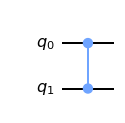

In [6]:
# define the oracle circuit
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw('mpl')

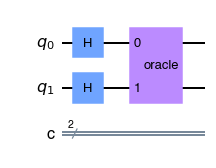

In [7]:
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.draw('mpl')

In [8]:
job = execute(grover_circ, backend)
result = job.result()
sv = result.get_statevector()
print(sv)

[ 0.5+0.j  0.5+0.j  0.5+0.j -0.5+0.j]


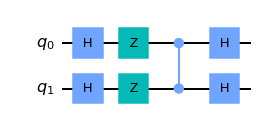

In [9]:
reflection = QuantumCircuit(2, name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()
reflection.draw('mpl')

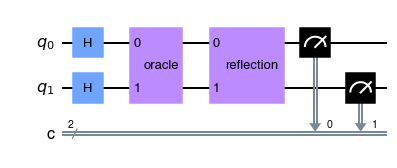

In [10]:
backend = Aer.get_backend('qasm_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.append(reflection,[0,1])
grover_circ.measure([0,1], [0,1])
grover_circ.draw('mpl')

In [12]:
job = execute(grover_circ, backend, shots=1)
result = job.result()
result.get_counts()

{'11': 1}